In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definindo classes

class Ray:
    def __init__(self, origin, direction):
        self.origin = origin
        self.direction = direction / np.linalg.norm(direction)


class Sphere:
    def __init__(self, center, radius, color, reflection=0.5):
        self.center = center
        self.radius = radius
        self.color = color
        self.reflection = reflection

    def intersect(self, ray):
        oc = ray.origin - self.center
        a = np.dot(ray.direction, ray.direction)
        b = 2.0 * np.dot(oc, ray.direction)
        c = np.dot(oc, oc) - self.radius**2
        discriminant = b**2 - 4*a*c
        if discriminant < 0:
            return None
        else:
            t1 = (-b - np.sqrt(discriminant)) / (2.0 * a)
            t2 = (-b + np.sqrt(discriminant)) / (2.0 * a)
            if t1 > 0:
                return t1
            if t2 > 0:
                return t2
        return None

In [3]:
#Criando uma cena

spheres = [
    Sphere(np.array([0, -1, 3]), 1, np.array([255, 0, 0]), 0.5),
    Sphere(np.array([2, 0, 4]), 1, np.array([0, 0, 255]), 0.5),
    Sphere(np.array([-2, 0, 4]), 1, np.array([0, 255, 0]), 0.5),
    Sphere(np.array([0, -5001, 0]), 5000, np.array([255, 255, 0]), 0.2),
    Sphere(np.array([0, 1, 3]), 0.5, np.array([255, 0, 255]), 0.7)
]

light_pos = np.array([5, 5, -10])
ambient = 0.2
background_color = np.array([0, 0, 0])
width = 800
height = 600

In [4]:
def trace_ray(ray, depth):
    if depth > 3:
        return background_color

    nearest_t = float('inf')
    nearest_sphere = None

    for sphere in spheres:
        t = sphere.intersect(ray)
        if t and t < nearest_t:
            nearest_t = t
            nearest_sphere = sphere

    if nearest_sphere is None:
        return background_color

    hit_point = ray.origin + ray.direction * nearest_t
    normal = (hit_point - nearest_sphere.center) / np.linalg.norm(hit_point - nearest_sphere.center)
    to_light = (light_pos - hit_point) / np.linalg.norm(light_pos - hit_point)
    
    shadow_ray = Ray(hit_point + normal * 0.001, to_light)
    shadow = False

    for sphere in spheres:
        if sphere.intersect(shadow_ray):
            shadow = True
            break

    if shadow:
        color = ambient * nearest_sphere.color
    else:
        color = (ambient + np.dot(to_light, normal)) * nearest_sphere.color

    reflection = nearest_sphere.reflection
    reflected_ray = Ray(hit_point + normal * 0.001, ray.direction - 2 * np.dot(ray.direction, normal) * normal)
    reflected_color = trace_ray(reflected_ray, depth + 1)

    return (1 - reflection) * color + reflection * reflected_color

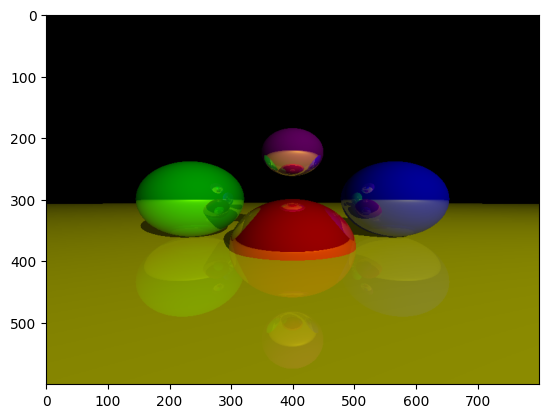

In [5]:
#Renderize a cenas

image = np.zeros((height, width, 3))
camera = np.array([0, 0, -1])
screen = (-1, 1, 1, -1) 

for i, y in enumerate(np.linspace(screen[2], screen[3], height)):
    for j, x in enumerate(np.linspace(screen[0], screen[1], width)):
        pixel = np.array([x, y, 0])
        direction = pixel - camera
        ray = Ray(camera, direction)
        color = trace_ray(ray, 0)
        image[i, j] = np.clip(color, 0, 255)

# Salve
plt.imsave('ray_tracing.png', image.astype(np.uint8))
plt.imshow(image.astype(np.uint8))
plt.show()